In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Pre-processing (for 20 Career Clusters)

In order to properly cluster occupation, we got inspired by the [16 Career Clusters principle](https://www.leyden212.org/Page/4244).

You can find more information about this principle in this [link](https://repository.library.georgetown.edu/handle/10822/559298).

After a quick exploration of the data, we decided to mofidy our occupation clusters such that the occuaptions are properly clustered :

1. (AFNR) Agriculture, Food and Natural Resources Careers
2. (AC) Architecture and Construction Careers
3. (AAVTC) Arts, Audio/Video Technology and Communications Careers
4. (BMA) Business Management and Administration Careers
5. (ET) Education and Training Careers
6. (F) Finance Careers
7. (GPA) Government and Public Administration Careers
8. (HS) Health Science Careers
9. (HumS) Human Services Careers
10. (IT) Information Technology Careers
11. (LPSCS) Law, Public Safety, Corrections, and Security Careers
12. (M) Manufacturing Careers
13. (MSS) Marketing, Sales, and Service Careers
14. (STEM) STEM (Science, Technology, Engineering, and Mathematics) Careers
15. (R) Religion related Careers
16. (AT) Academic and Teacher related Careers
17. (J) Journalism related Careers
18. (MW) Military and War related Careers
19. (AS) Aircraft and Space Careers
20. (NoOcc) nan, housewifes, ...

##  Step 1 : filtering out multiple occupation speakers

After selecting the meaningful features from the additional dataset, we get the dataframe `df_name_occup`.

Now, we apply some filtering to data in order to have just speakers with one occupation.

This assumption was made to decomplexify the analysis, since our goal is to predict the occupation of a speaker based on his quotations.

In [4]:
df_name_occup = pd.read_pickle("df_name_occup.zip")
df_name_occup

,id,label,occupation
0,Q23,George Washington,"(slaveholder, farmer, cartographer, military o..."
1,Q42,Douglas Adams,"(science fiction writer, playwright, comedian,..."
2,Q1868,Paul Otlet,"(bibliographer, information scientist, librari..."
3,Q207,George W. Bush,"(painter, rugby union player, motivational spe..."
4,Q297,Diego Velázquez,"(painter,)"
...,...,...,...
6073732,Q106406546,Leonard T. Gaskill,"(politician,)"
6073733,Q106406557,Andrew F. Healy,"(politician,)"
6073734,Q106406560,Barker B. Howard,"(politician,)"
6073735,Q106406571,Charles H. Macomber,"(politician,)"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc94e298dd0>]],
      dtype=object)

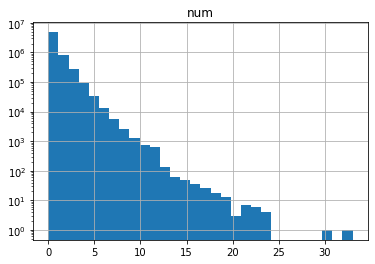

In [5]:
# Counting the number of occupations for each speaker
df_name_occup['num'] =  df_name_occup['occupation'].apply(lambda x: len(x))

# Distribution of the number of occupations 
df_name_occup.hist(column=['num'], bins=30, log=True)

In [6]:
# Sorting based on the number of occupations per speaker
df_name_occup = df_name_occup.sort_values(by=['num'], ascending=False)
df_name_occup

,id,label,occupation,num
8862,Q231690,B. R. Ambedkar,"(civil rights advocate, painter, bibliographer...",33
1521446,Q5879,Johann Wolfgang von Goethe,"(painter, poet lawyer, theologian, mineralogis...",30
604,Q34969,Benjamin Franklin,"(slaveholder, chess player, political activist...",24
3054272,Q380407,Nikolai Fomenko,"(racing automobile driver, television actor, f...",24
4557753,Q43432,Justin Timberlake,"(executive producer, television actor, film ac...",24
...,...,...,...,...
3257798,Q11717913,Jan Kapica,(),0
980344,Q11719359,Jan Warenycia,(),0
725478,Q99574609,Dennis Weit,(),0
1446761,Q96074744,Gerald Sandu,(),0


Now, we select only speakers with one occupation :

In [7]:
df_name_occup.drop(df_name_occup[df_name_occup.num != 1].index, inplace=True)

In [8]:
df_name_occup

,id,label,occupation,num
4217584,Q55949992,Jennifer Tieman,"(researcher,)",1
3566293,Q82465167,Ana Paula de Souza Faloni,"(researcher,)",1
3567209,Q83005543,Hossein Mahmoudi,"(researcher,)",1
4254608,Q59706337,Agnieszka Lipiec,"(researcher,)",1
4217407,Q55932331,Kevin McDade,"(artist,)",1
...,...,...,...,...
2243079,Q99555514,Rachel Shah,"(researcher,)",1
2243078,Q99555385,Shubhangi Prabhudesai,"(researcher,)",1
2243077,Q99555373,Matthew B Phillips,"(researcher,)",1
2243094,Q99555985,Marina Kholomyeva,"(researcher,)",1


In [9]:
# We can get rid of 'num' column
df_name_occup.drop(columns=['num'], inplace=True)

In [10]:
df_name_occup

,id,label,occupation
4217584,Q55949992,Jennifer Tieman,"(researcher,)"
3566293,Q82465167,Ana Paula de Souza Faloni,"(researcher,)"
3567209,Q83005543,Hossein Mahmoudi,"(researcher,)"
4254608,Q59706337,Agnieszka Lipiec,"(researcher,)"
4217407,Q55932331,Kevin McDade,"(artist,)"
...,...,...,...
2243079,Q99555514,Rachel Shah,"(researcher,)"
2243078,Q99555385,Shubhangi Prabhudesai,"(researcher,)"
2243077,Q99555373,Matthew B Phillips,"(researcher,)"
2243094,Q99555985,Marina Kholomyeva,"(researcher,)"


One additional sub-step is to change the `occupation` feature to string type. This would be helpful for further pre-processing.

In [11]:
df_name_occup['occupation'] = df_name_occup['occupation'].apply(lambda x: str(x[0]))
df_name_occup['occupation'] = df_name_occup['occupation'].astype("string")
df_name_occup

,id,label,occupation
4217584,Q55949992,Jennifer Tieman,researcher
3566293,Q82465167,Ana Paula de Souza Faloni,researcher
3567209,Q83005543,Hossein Mahmoudi,researcher
4254608,Q59706337,Agnieszka Lipiec,researcher
4217407,Q55932331,Kevin McDade,artist
...,...,...,...
2243079,Q99555514,Rachel Shah,researcher
2243078,Q99555385,Shubhangi Prabhudesai,researcher
2243077,Q99555373,Matthew B Phillips,researcher
2243094,Q99555985,Marina Kholomyeva,researcher


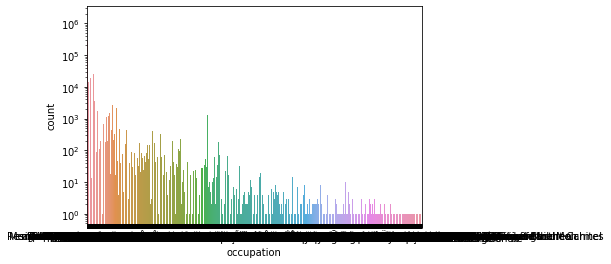

In [12]:
# Let's see the distribution of occupations for our dataframe
sns.countplot(data=df_name_occup, x='occupation', log=True)

**Note :** 

This is expected since we did not clustered the occupations yet ...

## Step 2 : Get unique occupations in the additional dataset

The first sub-step is to group the dataframe by `occupation`.

In [13]:
df_name_occup_grouped_sorted = df_name_occup.groupby(by='occupation').count().sort_values(by='id', ascending=False)
df_name_occup_grouped_sorted

,id,label
occupation,,
researcher,1666625,1666625
politician,375297,375297
association football player,279531,279531
actor,143110,143110
basketball player,126539,126539
...,...,...
data journalist,1,1
data librarian,1,1
dauphin of France,1,1


**Note :** the `id` and `label` are both representing the number of times each occupation got reapeated in the filtered additional dataset.

In [14]:
df_name_occup_grouped_sorted.rename(columns={"label": "num_occurencies"}, inplace=True)
df_name_occup_grouped_sorted.drop(columns='id', inplace=True)

In [15]:
df_name_occup_grouped_sorted

,num_occurencies
occupation,
researcher,1666625
politician,375297
association football player,279531
actor,143110
basketball player,126539
...,...
data journalist,1
data librarian,1
dauphin of France,1


So, there are 6811 unique professions. 

In order to proprely cluster these occupations, we decided to set a threshold on the number of occurencies of each occupation in the filtered additional dataset.

### Threshold selection :

Since the occupation clustering would be done manually, our main concern was to have a reasonable number of occupation to cluster. Thus, we decided that around 300 occupations would be sufficient to create the 20 Career Clusters we mentionned earlier.

After some tries, we found out that this amount of occupations approximately matches the occurence threshold of 1000 for each occupation.

Text(0, 0.5, 'number of occurencies')

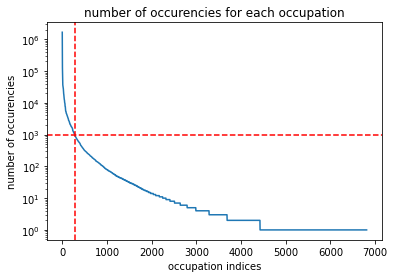

In [16]:
occurence_threshold = 1000
g_result = sns.lineplot(x=df_name_occup_grouped_sorted.reset_index().reset_index().index,y=df_name_occup_grouped_sorted.reset_index().reset_index().num_occurencies)
g_result.set_title('number of occurencies for each occupation')
g_result.set(yscale='log')
g_result.axhline(occurence_threshold, color='r', ls='--')
g_result.axvline(280, color='r', ls='--')
g_result.set_xlabel('occupation indices')
g_result.set_ylabel('number of occurencies')

In [17]:
unique_occupations = df_name_occup_grouped_sorted.loc[df_name_occup_grouped_sorted['num_occurencies'] > 1000]
unique_occupations

,num_occurencies
occupation,
researcher,1666625
politician,375297
association football player,279531
actor,143110
basketball player,126539
...,...
tarento,1030
poker player,1024
statistician,1015


Thus, we are manually clustering 280 occupations into the 20 Career Clusters.

## Step 3 : Occupation Clustering

We will now proceed to the clustering of 280 occupations manually.

### Career Cluster 1 : AFNR

In [18]:
tokens = ['farmer', 'explorer', 'agronomist']

# Add manually occupations that are considered in : Agriculture, Food and Natural Resources Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 1
  unique_occupations.loc[logi, 'classe_label'] = 'AFNR'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

### Career Cluster 2 : AC

In [19]:
tokens = ['architect', 'civil engineer']

# Add manually occupations that are considered in : Architecture and Construction Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 2
  unique_occupations.loc[logi, 'classe_label'] = 'AC'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Career Cluster 3 : AAVTC

In [20]:
tokens = ['actor', 'painter', 'writer', 'visual artist', 'musician', 'singer', 'artist', 'photographer', 'composer', 'poet', 'film director',
          'film producer', 'author', 'novelist', 'screenwriter', 'cinematographer', 'pianist', 'model', 'performing artist', 'mangaka', 
          'film actor', 'singer-songwriter', 'comics artist', 'seiyû', 'dancer', 'pornographic actor', 'guitarist', 'production designer', 
          'stage actor', 'recording supervisor', 'editor', 'designer', 'violonist', 'songwriter', 'rapper', 'AV idol', 'drummer', 
          'voice actor', 'costume designer', 'fashion designer', 'contributing editor', 'theater director', 'non-fiction writer', 
          'choreographer', 'ballet dancer', 'printmaker', 'organist', 'playwright', 'comedian', 'television producer', 'record producer', 
          'lyricist', 'cartoonist', 'disc jockey', 'graphic designer', 'scenographer', 'make-up artist', 'art collector', 'tarento']

# Add manually occupations that are considered in : Arts, Audio/Video Technology and Communications Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 3
  unique_occupations.loc[logi, 'classe_label'] = 'AAVTC'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 4 : BMA

In [21]:
tokens = ['businessperson', 'entrepreneur', 'director', 'business execituve', 'manager', 'drawer', 'industrialist']

# Add manually occupations that are considered in : Business Management and Administration Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 4
  unique_occupations.loc[logi, 'classe_label'] = 'BMA'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 5 : ET

In [22]:
tokens = ['association football player', 'basketball player', 'cricketer', 'baseball player', 'sport cyclist', 'ice hockey player', 
          'American football player', 'athletics competitor', 'badminton player', 'athlete', 'chess player', 'rugby union player', 
          'rower', 'boxer', 'Australian rules football player', 'volleyball player', 'swimmer', 'handball player', 'amateur wrestler', 
          'tennis player', 'rugby league player', 'judoka', 'fencer', 'field hockey player', 'golfer', 'artistic gymnast', 'canoeist', 
          'figure skater', 'alpine skier', 'taekwondo athlete', 'sprinter', 'association football refree', 'sport shooter', 'weightlifter', 
          'water polo player', 'motorcycle racer', 'cross-country skier', 'racing automobile driver', 'coach', 'table tennis player', 
          'racing driver', 'speed skater', 'professional wrestler', 'basketball coach', 'jockey', 'association football manager', 'biathlete', 
          'mixed martial artist', 'correspondence chess player', 'musher', 'Canadian football player', 'hurler', 'gymnast', 'rikishi', 
          'rhythmic gymnast', 'head coach', 'archer', 'bridge player', 'competitive diver', 'squash player', 'Gaelic football player', 
          'karateka', 'mountaineer', 'horse trainer', 'long-distance runner', 'triathlete', 'bobsledder', 'freestyle skier', 'snowboarder', 
          'poker player']

# Add manually occupations that are considered in : Education and Training Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 5
  unique_occupations.loc[logi, 'classe_label'] = 'ET'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 6 : F

In [23]:
tokens = ['economist', 'trade unionist']

# Add manually occupations that are considered in : Education and Training Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 6
  unique_occupations.loc[logi, 'classe_label'] = 'F'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Career Cluster 7 : GPA

In [24]:
tokens = ['politician', 'diplomat', 'aristocrat', 'political candidate', 'political scientist', 'minister', 'monarch', 'sovereign', 'gentry', 'gaffer', 'mayor', 'assistant director', 'ruler']

# Add manually occupations that are considered in : Government and Public Administration Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 7
  unique_occupations.loc[logi, 'classe_label'] = 'GPA'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 8 : HS

In [25]:
tokens = ['surgeon', 'psychiatrist', 'nurse', 'pharmacist', 'veterinarian', 'dentist']

# Add manually occupations that are considered in : Health Science Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 8
  unique_occupations.loc[logi, 'classe_label'] = 'HS'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 9 : HumS

In [26]:
tokens = ['conductor', 'banker', 'curler']

# Add manually occupations that are considered in : Human Services Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 9
  unique_occupations.loc[logi, 'classe_label'] = 'HumS'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 10 : IT

In [27]:
tokens = ['audio engineer', 'illustrator', 'computer scientist', 'archivist', 'scientific illustrator']

# Add manually occupations that are considered in : Information Technology Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 10
  unique_occupations.loc[logi, 'classe_label'] = 'IT'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 11 : LPSCS

In [28]:
tokens = ['lawyer', 'jurist', 'judge', 'police officer', 'revolutionary', 'magistrate', 'councillor', 'resistance fighter', 
          'legal cousel', 'human rights activist']

# Add manually occupations that are considered in : Law, Public Safety, Corrections, and Security Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 11
  unique_occupations.loc[logi, 'classe_label'] = 'LPSCS'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 12 : M

In [29]:
tokens = ['sculptor', 'sailor', 'inventor', 'printer', 'organ builder', 'chef', 'ceramicist']

# Add manually occupations that are considered in : Manufacturing Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 12
  unique_occupations.loc[logi, 'classe_label'] = 'M'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 13 : MSS

In [30]:
tokens = ['civil servant', 'merchant', 'librarian', 'bookseller']

# Add manually occupations that are considered in : Marketing, Sales, and Service Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 13
  unique_occupations.loc[logi, 'classe_label'] = 'MSS'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 14 : STEM

In [31]:
tokens = ['researcher', 'botanist', 'historian', 'physician', 'entomologist', 'engineer', 'scientist', 'mathematician', 
          'physicist', 'chemist', 'philosopher', 'theologian', 'art historian', 'psychologist', 'archeologist', 
          'zoologist', 'sociologist', 'biologist', 'geologist', 'Esperantist', 'geographer', 'ichthyologist', 
          'anthropologist', 'philologist', 'paleontologist', 'musicologist', 'herpetologist', 'biochemist', 
          'ornithologist', 'volapükologist', 'arachnologist', 'suffragist', 'mechanical engineer', 'electrical engineer', 
          'statistician']

# Add manually occupations that are considered in : STEM (Science, Technology, Engineering, and Mathematics) Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 14
  unique_occupations.loc[logi, 'classe_label'] = 'STEM'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 15 : R

In [32]:
tokens = ['Catholic priest', 'priest', 'pastor', 'missionary', 'official', 'rabbi', 'religious', 'monk', 'prelate', 
          'nun', 'bhikkhu', 'religious leader', 'parson', 'Anglican priest', 'cleric', 'Abbot', 'curator']

# Add manually occupations that are considered in : Religion related Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 15
  unique_occupations.loc[logi, 'classe_label'] = 'R'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 16 : AT

In [33]:
tokens = ['university teacher', 'teacher', 'academic', 'pedagogue', 'professor', 'high school teacher', 
          'educator', 'literary scholar', 'German scholar']

# Add manually occupations that are considered in : Academic and Teacher related Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 16
  unique_occupations.loc[logi, 'classe_label'] = 'AT'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 17 : J

In [34]:
tokens = ['journalist', 'translator', 'linguist', 'announcer', 'publisher', 'television presenter', 'radio personality', 'photojournalist', 'literary critic', 'opinion journalist']

# Add manually occupations that are considered in : Journalism related Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 17
  unique_occupations.loc[logi, 'classe_label'] = 'J'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 18 : MW

In [35]:
tokens = ['military personnel', 'military officer', 'military leader', 'soldier', 'naval officer', 
          'military commander', 'samurai']

# Add manually occupations that are considered in : Military and War related Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 18
  unique_occupations.loc[logi, 'classe_label'] = 'MW'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Career Cluster 19 : AS

In [36]:
tokens = ['aircraft pilot', 'astronomer']

# Add manually occupations that are considered in : Aircraft and Space Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 19
  unique_occupations.loc[logi, 'classe_label'] = 'AS'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Career Cluster 20 : NoOcc

In [37]:
tokens = ['nan', 'housewife']

# Add manually occupations that are considered in : nan, housewife, ...

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 20
  unique_occupations.loc[logi, 'classe_label'] = 'NoOcc'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Let's see the result after clustering the occupations !

In [38]:
unique_occupations

,num_occurencies,classe,classe_label
occupation,,,
researcher,1666625,14.0,STEM
politician,375297,7.0,GPA
association football player,279531,5.0,ET
actor,143110,3.0,AAVTC
basketball player,126539,5.0,ET
...,...,...,...
tarento,1030,3.0,AAVTC
poker player,1024,5.0,ET
statistician,1015,14.0,STEM


## Step 4 : Joining the clustered unique occupations with the filtered additional dataset



In [39]:
unique_occ_for_join = unique_occupations.drop(columns=['num_occurencies'])
unique_occ_for_join

,classe,classe_label
occupation,,
researcher,14.0,STEM
politician,7.0,GPA
association football player,5.0,ET
actor,3.0,AAVTC
basketball player,5.0,ET
...,...,...
tarento,3.0,AAVTC
poker player,5.0,ET
statistician,14.0,STEM


In [40]:
# Some manipulations to make the join possible
df_ready_for_join = df_name_occup.reset_index().set_index('occupation')
df_ready_for_join

,index,id,label
occupation,,,
researcher,4217584,Q55949992,Jennifer Tieman
researcher,3566293,Q82465167,Ana Paula de Souza Faloni
researcher,3567209,Q83005543,Hossein Mahmoudi
researcher,4254608,Q59706337,Agnieszka Lipiec
artist,4217407,Q55932331,Kevin McDade
...,...,...,...
researcher,2243079,Q99555514,Rachel Shah
researcher,2243078,Q99555385,Shubhangi Prabhudesai
researcher,2243077,Q99555373,Matthew B Phillips


In [41]:
# Performing the join
df_name_occup_clustered = df_ready_for_join.join(unique_occ_for_join, on='occupation')
df_name_occup_clustered.reset_index(inplace=True)
df_name_occup_clustered.set_index('index', inplace=True)
df_name_occup_clustered

,occupation,id,label,classe,classe_label
index,,,,,
4217584,researcher,Q55949992,Jennifer Tieman,14.0,STEM
3566293,researcher,Q82465167,Ana Paula de Souza Faloni,14.0,STEM
3567209,researcher,Q83005543,Hossein Mahmoudi,14.0,STEM
4254608,researcher,Q59706337,Agnieszka Lipiec,14.0,STEM
4217407,artist,Q55932331,Kevin McDade,3.0,AAVTC
...,...,...,...,...,...
2243079,researcher,Q99555514,Rachel Shah,14.0,STEM
2243078,researcher,Q99555385,Shubhangi Prabhudesai,14.0,STEM
2243077,researcher,Q99555373,Matthew B Phillips,14.0,STEM


**Note :** 

Since we only clustered 280 occupations out of 6811, it is expected to have NaN values in the `classe` and `classe_label` features for the non clustered occupations.

We deal with this problem in [Data_Processing](https://github.com/epfl-ada/ada-2021-project-k-dim/blob/main/code/Milestone_3/Data_Processing.ipynb) notebook before merging with the Quote dataset.

### Some sanity checks


In [42]:
# Percentage for each Career Cluster in the filtered additional dataset
for i in range(1, 21):
  print('for classe ', i, ' : ', (df_name_occup_clustered[df_name_occup_clustered['classe'] == i].shape[0] / df_name_occup_clustered.shape[0])*100, ' %')

for classe  1  :  0.15109860544741413  %
for classe  2  :  0.6780914679474762  %
for classe  3  :  15.27505285657284  %
for classe  4  :  1.4868342845032971  %
for classe  5  :  18.25726871006783  %
for classe  6  :  0.433158993564495  %
for classe  7  :  8.716119226547328  %
for classe  8  :  0.25658409948459665  %
for classe  9  :  0.2147375880184042  %
for classe  10  :  0.17024203922893147  %
for classe  11  :  1.0393746285139065  %
for classe  12  :  0.7413165384367038  %
for classe  13  :  0.454371987754825  %
for classe  14  :  39.86635606704051  %
for classe  15  :  1.6430653997645668  %
for classe  16  :  1.214004135809521  %
for classe  17  :  1.6148159001842737  %
for classe  18  :  1.6247704857506626  %
for classe  19  :  0.1532302526684912  %
for classe  20  :  0.10080828751326588  %


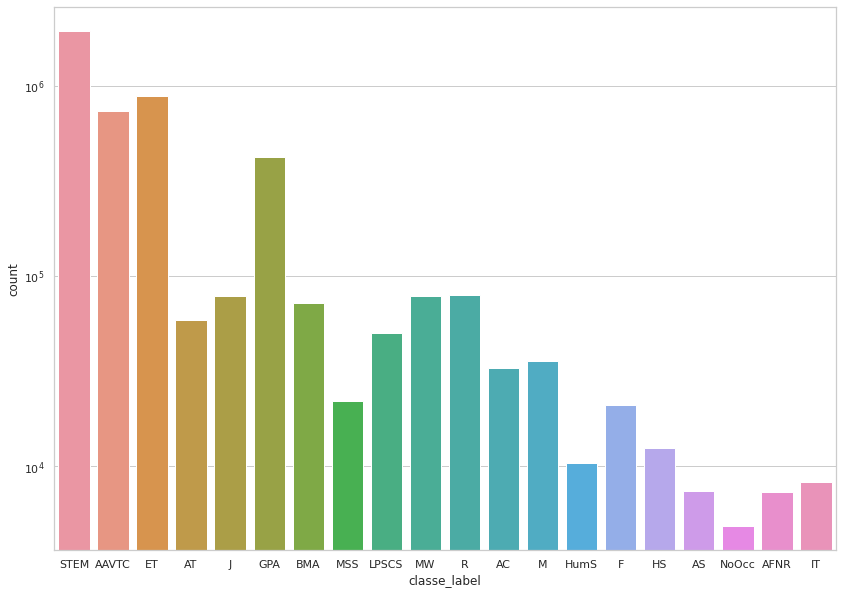

In [43]:
# Distribution of the 20 Career Clusters over the filtered additional dataset
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(14, 10))
sns.countplot(x="classe_label", data=df_name_occup_clustered, log=True)

## Step 5 : Storing the result

Now that the pre-processing has been conducted, it is time for my colleague to perform some data processing.

In order to avoid overloading only one notebook, we decided to share the result of Pre-processing and Data Processing by using pickle format.

In [44]:
df_name_occup_clustered.to_pickle("df_name_occup_clustered.zip")

# Pre-processing (for 12 Career Clusters)

We started first by eliminating some Career Clusters, and merging others together. We can justify this approach by looking at the distribution of each class (see plots **Data Processing** notebook).

These are the 12 Career Clusters we had after the rearrangement of the 20 Career Clusters :

1. **(AAVTC)** Arts, Audio/Video Technology and Communications Careers
2. **(BMAxF)** Business Management and Administration and Finance Careers
3. **(ST)** Sports and Training Careers
4. **(GPAxLPSCS)** Government and Public Administration and Law, Public Safety, Corrections, and Security Careers
5. **(HS)** Health Science Careers
6. **(MSSxHumS)** Marketing, Sales, and Service, Human Services Careers
7. **(M)** Manufacturing Careers
8. **(STEMxIT)** STEM (Science, Technology, Engineering, and Mathematics), and Information Technology Careers
9. **(R)** Religion related Careers
10. **(ATE)** Academic, Teacher and Education related Careers
11. **(J)** Journalism related Careers
12. **(MW)** Military and War related Careers

**Note :** For this pre-processing (for 12 Career Clusters), we can resue the results of the first and second steps in the pre-processing (for 20 Career Clusters).

##  Step 1 : filtering out multiple occupation speakers

After selecting the meaningful features from the additional dataset, we get the dataframe `df_name_occup`.

Now, we apply some filtering to data in order to have just speakers with one occupation.

This assumption was made to decomplexify the analysis, since our goal is to predict the occupation of a speaker based on his quotations.

In [153]:
df_name_occup = pd.read_pickle("df_name_occup.zip")
df_name_occup

,id,label,occupation
0,Q23,George Washington,"(slaveholder, farmer, cartographer, military o..."
1,Q42,Douglas Adams,"(science fiction writer, playwright, comedian,..."
2,Q1868,Paul Otlet,"(bibliographer, information scientist, librari..."
3,Q207,George W. Bush,"(painter, rugby union player, motivational spe..."
4,Q297,Diego Velázquez,"(painter,)"
...,...,...,...
6073732,Q106406546,Leonard T. Gaskill,"(politician,)"
6073733,Q106406557,Andrew F. Healy,"(politician,)"
6073734,Q106406560,Barker B. Howard,"(politician,)"
6073735,Q106406571,Charles H. Macomber,"(politician,)"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5574c53710>]],
      dtype=object)

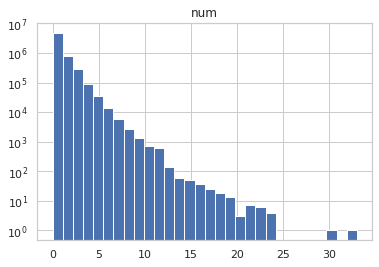

In [154]:
# Counting the number of occupations for each speaker
df_name_occup['num'] =  df_name_occup['occupation'].apply(lambda x: len(x))

# Distribution of the number of occupations 
df_name_occup.hist(column=['num'], bins=30, log=True)

In [155]:
# Sorting based on the number of occupations per speaker
df_name_occup = df_name_occup.sort_values(by=['num'], ascending=False)
df_name_occup

,id,label,occupation,num
8862,Q231690,B. R. Ambedkar,"(civil rights advocate, painter, bibliographer...",33
1521446,Q5879,Johann Wolfgang von Goethe,"(painter, poet lawyer, theologian, mineralogis...",30
604,Q34969,Benjamin Franklin,"(slaveholder, chess player, political activist...",24
3054272,Q380407,Nikolai Fomenko,"(racing automobile driver, television actor, f...",24
4557753,Q43432,Justin Timberlake,"(executive producer, television actor, film ac...",24
...,...,...,...,...
3257798,Q11717913,Jan Kapica,(),0
980344,Q11719359,Jan Warenycia,(),0
725478,Q99574609,Dennis Weit,(),0
1446761,Q96074744,Gerald Sandu,(),0


Now, we select only speakers with one occupation :

In [156]:
df_name_occup.drop(df_name_occup[df_name_occup.num != 1].index, inplace=True)

In [157]:
df_name_occup

,id,label,occupation,num
4217584,Q55949992,Jennifer Tieman,"(researcher,)",1
3566293,Q82465167,Ana Paula de Souza Faloni,"(researcher,)",1
3567209,Q83005543,Hossein Mahmoudi,"(researcher,)",1
4254608,Q59706337,Agnieszka Lipiec,"(researcher,)",1
4217407,Q55932331,Kevin McDade,"(artist,)",1
...,...,...,...,...
2243079,Q99555514,Rachel Shah,"(researcher,)",1
2243078,Q99555385,Shubhangi Prabhudesai,"(researcher,)",1
2243077,Q99555373,Matthew B Phillips,"(researcher,)",1
2243094,Q99555985,Marina Kholomyeva,"(researcher,)",1


In [158]:
# We can get rid of 'num' column
df_name_occup.drop(columns=['num'], inplace=True)

In [159]:
df_name_occup

,id,label,occupation
4217584,Q55949992,Jennifer Tieman,"(researcher,)"
3566293,Q82465167,Ana Paula de Souza Faloni,"(researcher,)"
3567209,Q83005543,Hossein Mahmoudi,"(researcher,)"
4254608,Q59706337,Agnieszka Lipiec,"(researcher,)"
4217407,Q55932331,Kevin McDade,"(artist,)"
...,...,...,...
2243079,Q99555514,Rachel Shah,"(researcher,)"
2243078,Q99555385,Shubhangi Prabhudesai,"(researcher,)"
2243077,Q99555373,Matthew B Phillips,"(researcher,)"
2243094,Q99555985,Marina Kholomyeva,"(researcher,)"


One additional sub-step is to change the `occupation` feature to string type. This would be helpful for further pre-processing.

In [160]:
df_name_occup['occupation'] = df_name_occup['occupation'].apply(lambda x: str(x[0]))
df_name_occup['occupation'] = df_name_occup['occupation'].astype("string")
df_name_occup

,id,label,occupation
4217584,Q55949992,Jennifer Tieman,researcher
3566293,Q82465167,Ana Paula de Souza Faloni,researcher
3567209,Q83005543,Hossein Mahmoudi,researcher
4254608,Q59706337,Agnieszka Lipiec,researcher
4217407,Q55932331,Kevin McDade,artist
...,...,...,...
2243079,Q99555514,Rachel Shah,researcher
2243078,Q99555385,Shubhangi Prabhudesai,researcher
2243077,Q99555373,Matthew B Phillips,researcher
2243094,Q99555985,Marina Kholomyeva,researcher


## Step 2 : Get unique occupations in the additional dataset

The first sub-step is to group the dataframe by `occupation`.

In [161]:
df_name_occup_grouped_sorted = df_name_occup.groupby(by='occupation').count().sort_values(by='id', ascending=False)
df_name_occup_grouped_sorted

,id,label
occupation,,
researcher,1666625,1666625
politician,375297,375297
association football player,279531,279531
actor,143110,143110
basketball player,126539,126539
...,...,...
data journalist,1,1
data librarian,1,1
dauphin of France,1,1


**Note :** the `id` and `label` are both representing the number of times each occupation got reapeated in the filtered additional dataset.

In [162]:
df_name_occup_grouped_sorted.rename(columns={"label": "num_occurencies"}, inplace=True)
df_name_occup_grouped_sorted.drop(columns='id', inplace=True)

In [163]:
df_name_occup_grouped_sorted

,num_occurencies
occupation,
researcher,1666625
politician,375297
association football player,279531
actor,143110
basketball player,126539
...,...
data journalist,1
data librarian,1
dauphin of France,1


So, there are 6811 unique professions. 

In order to proprely cluster these occupations, we decided to set a threshold on the number of occurencies of each occupation in the filtered additional dataset.

### Threshold selection :

Since the occupation clustering would be done manually, our main concern was to have a reasonable number of occupation to cluster. Thus, we decided that around 300 occupations would be sufficient to create the 12 Career Clusters we mentionned earlier.

After some tries, we found out that this amount of occupations approximately matches the occurence threshold of 1000 for each occupation.

Text(0, 0.5, 'number of occurencies')

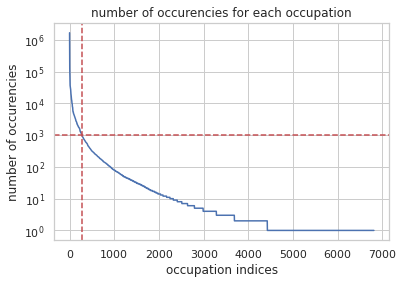

In [164]:
occurence_threshold = 1000
g_result = sns.lineplot(x=df_name_occup_grouped_sorted.reset_index().reset_index().index,y=df_name_occup_grouped_sorted.reset_index().reset_index().num_occurencies)
g_result.set_title('number of occurencies for each occupation')
g_result.set(yscale='log')
g_result.axhline(occurence_threshold, color='r', ls='--')
g_result.axvline(280, color='r', ls='--')
g_result.set_xlabel('occupation indices')
g_result.set_ylabel('number of occurencies')

In [165]:
unique_occupations = df_name_occup_grouped_sorted.loc[df_name_occup_grouped_sorted['num_occurencies'] > 1000]
unique_occupations

,num_occurencies
occupation,
researcher,1666625
politician,375297
association football player,279531
actor,143110
basketball player,126539
...,...
tarento,1030
poker player,1024
statistician,1015


Thus, we are manually clustering 280 occupations into the 12 Career Clusters.

## Step 3 : Occupation Clustering

We will now proceed to the clustering of 280 occupations manually.

### New Cluster 1 : AAVTC

In [166]:
tokens = ['actor', 'painter', 'writer', 'visual artist', 'musician', 'singer', 'artist', 'photographer', 'composer', 'poet', 'film director',
          'film producer', 'author', 'novelist', 'screenwriter', 'cinematographer', 'pianist', 'model', 'performing artist', 'mangaka', 
          'film actor', 'singer-songwriter', 'comics artist', 'seiyû', 'dancer', 'pornographic actor', 'guitarist', 'production designer', 
          'stage actor', 'recording supervisor', 'editor', 'designer', 'violonist', 'songwriter', 'rapper', 'AV idol', 'drummer', 
          'voice actor', 'costume designer', 'fashion designer', 'contributing editor', 'theater director', 'non-fiction writer', 
          'choreographer', 'ballet dancer', 'printmaker', 'organist', 'playwright', 'comedian', 'television producer', 'record producer', 
          'lyricist', 'cartoonist', 'disc jockey', 'graphic designer', 'scenographer', 'make-up artist', 'art collector', 'tarento']

# Add manually occupations that are considered in : Arts, Audio/Video Technology and Communications Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 1
  unique_occupations.loc[logi, 'classe_label'] = 'AAVTC'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

### New Cluster 2 : BMA + F

In [167]:
tokens = ['businessperson', 'entrepreneur', 'director', 'business execituve', 'manager', 'drawer', 'industrialist', 'economist', 'trade unionist']

# Add manually occupations that are considered in : Business Management and Administration, and Finance Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 2
  unique_occupations.loc[logi, 'classe_label'] = 'BMAxF'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 3 : ST

In [168]:
tokens = ['association football player', 'basketball player', 'cricketer', 'baseball player', 'sport cyclist', 'ice hockey player', 
          'American football player', 'athletics competitor', 'badminton player', 'athlete', 'chess player', 'rugby union player', 
          'rower', 'boxer', 'Australian rules football player', 'volleyball player', 'swimmer', 'handball player', 'amateur wrestler', 
          'tennis player', 'rugby league player', 'judoka', 'fencer', 'field hockey player', 'golfer', 'artistic gymnast', 'canoeist', 
          'figure skater', 'alpine skier', 'taekwondo athlete', 'sprinter', 'association football refree', 'sport shooter', 'weightlifter', 
          'water polo player', 'motorcycle racer', 'cross-country skier', 'racing automobile driver', 'coach', 'table tennis player', 
          'racing driver', 'speed skater', 'professional wrestler', 'basketball coach', 'jockey', 'association football manager', 'biathlete', 
          'mixed martial artist', 'correspondence chess player', 'musher', 'Canadian football player', 'hurler', 'gymnast', 'rikishi', 
          'rhythmic gymnast', 'head coach', 'archer', 'bridge player', 'competitive diver', 'squash player', 'Gaelic football player', 
          'karateka', 'mountaineer', 'horse trainer', 'long-distance runner', 'triathlete', 'bobsledder', 'freestyle skier', 'snowboarder', 
          'poker player']

# Add manually occupations that are considered in : Sports and Training Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 3
  unique_occupations.loc[logi, 'classe_label'] = 'ST'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 4 : GPA + LPSCS

In [169]:
tokens = ['politician', 'diplomat', 'aristocrat', 'political candidate', 'political scientist', 'minister', 'monarch', 'sovereign', 'gentry', 'gaffer', 'mayor', 
          'assistant director', 'ruler', 'lawyer', 'jurist', 'judge', 'police officer', 'revolutionary', 'magistrate', 'councillor', 'resistance fighter', 'legal cousel', 'human rights activist']

# Add manually occupations that are considered in : Government and Public Administration Careers and LPSCS Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 4
  unique_occupations.loc[logi, 'classe_label'] = 'GPAxLPSCS'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 5 : HS

In [170]:
tokens = ['surgeon', 'psychiatrist', 'nurse', 'pharmacist', 'veterinarian', 'dentist']

# Add manually occupations that are considered in : Health Science Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 5
  unique_occupations.loc[logi, 'classe_label'] = 'HS'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 6 : MSS + HumS

In [171]:
tokens = ['civil servant', 'merchant', 'librarian', 'bookseller', 'conductor', 'banker', 'curler']

# Add manually occupations that are considered in : Marketing, Sales, and Service Careers and Human Services Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 6
  unique_occupations.loc[logi, 'classe_label'] = 'MSSxHumS'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 7 : M

In [172]:
tokens = ['sculptor', 'sailor', 'inventor', 'printer', 'organ builder', 'chef', 'ceramicist']

# Add manually occupations that are considered in : Manufacturing Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 7
  unique_occupations.loc[logi, 'classe_label'] = 'M'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 8 : STEM + IT

In [173]:
tokens = ['researcher', 'botanist', 'historian', 'physician', 'entomologist', 'engineer', 'scientist', 'mathematician', 
          'physicist', 'chemist', 'philosopher', 'theologian', 'art historian', 'psychologist', 'archeologist', 
          'zoologist', 'sociologist', 'biologist', 'geologist', 'Esperantist', 'geographer', 'ichthyologist', 
          'anthropologist', 'philologist', 'paleontologist', 'musicologist', 'herpetologist', 'biochemist', 
          'ornithologist', 'volapükologist', 'arachnologist', 'suffragist', 'mechanical engineer', 'electrical engineer', 
          'statistician', 'audio engineer', 'illustrator', 'computer scientist', 'archivist', 'scientific illustrator', 
          'agronomist', 'architect', 'civil engineer']

# Add manually occupations that are considered in : STEM (Science, Technology, Engineering, and Mathematics) Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 8
  unique_occupations.loc[logi, 'classe_label'] = 'STEMxIT'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 9 : R

In [174]:
tokens = ['Catholic priest', 'priest', 'pastor', 'missionary', 'official', 'rabbi', 'religious', 'monk', 'prelate', 
          'nun', 'bhikkhu', 'religious leader', 'parson', 'Anglican priest', 'cleric', 'Abbot', 'curator']

# Add manually occupations that are considered in : Religion related Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 9
  unique_occupations.loc[logi, 'classe_label'] = 'R'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 10 : ATE

In [175]:
tokens = ['university teacher', 'teacher', 'academic', 'pedagogue', 'professor', 'high school teacher', 
          'educator', 'literary scholar', 'German scholar']

# Add manually occupations that are considered in : Academic, Teacher and Education related Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 10
  unique_occupations.loc[logi, 'classe_label'] = 'ATE'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 11 : J

In [176]:
tokens = ['journalist', 'translator', 'linguist', 'announcer', 'publisher', 'television presenter', 'radio personality', 'photojournalist', 'literary critic', 'opinion journalist']

# Add manually occupations that are considered in : Journalism related Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 11
  unique_occupations.loc[logi, 'classe_label'] = 'J'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### New Cluster 12 : MW

In [177]:
tokens = ['military personnel', 'military officer', 'military leader', 'soldier', 'naval officer', 
          'military commander', 'samurai', 'aircraft pilot']

# Add manually occupations that are considered in : Military and War related Careers

for token in tokens:
  logi = unique_occupations.index.str.find(token) != -1
  unique_occupations.loc[logi, 'classe'] = 12
  unique_occupations.loc[logi, 'classe_label'] = 'MW'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Let's see the result after clustering the occupations !

In [178]:
unique_occupations

,num_occurencies,classe,classe_label
occupation,,,
researcher,1666625,8.0,STEMxIT
politician,375297,4.0,GPAxLPSCS
association football player,279531,3.0,ST
actor,143110,1.0,AAVTC
basketball player,126539,3.0,ST
...,...,...,...
tarento,1030,1.0,AAVTC
poker player,1024,3.0,ST
statistician,1015,8.0,STEMxIT


## Step 4 : Joining the clustered unique occupations with the filtered additional dataset



In [179]:
unique_occ_for_join = unique_occupations.drop(columns=['num_occurencies'])
unique_occ_for_join

,classe,classe_label
occupation,,
researcher,8.0,STEMxIT
politician,4.0,GPAxLPSCS
association football player,3.0,ST
actor,1.0,AAVTC
basketball player,3.0,ST
...,...,...
tarento,1.0,AAVTC
poker player,3.0,ST
statistician,8.0,STEMxIT


In [180]:
# Some manipulations to make the join possible
df_ready_for_join = df_name_occup.reset_index().set_index('occupation')
df_ready_for_join

,index,id,label
occupation,,,
researcher,4217584,Q55949992,Jennifer Tieman
researcher,3566293,Q82465167,Ana Paula de Souza Faloni
researcher,3567209,Q83005543,Hossein Mahmoudi
researcher,4254608,Q59706337,Agnieszka Lipiec
artist,4217407,Q55932331,Kevin McDade
...,...,...,...
researcher,2243079,Q99555514,Rachel Shah
researcher,2243078,Q99555385,Shubhangi Prabhudesai
researcher,2243077,Q99555373,Matthew B Phillips


In [181]:
# Performing the join
df_name_occup_clustered = df_ready_for_join.join(unique_occ_for_join, on='occupation')
df_name_occup_clustered.reset_index(inplace=True)
df_name_occup_clustered.set_index('index', inplace=True)
df_name_occup_clustered

,occupation,id,label,classe,classe_label
index,,,,,
4217584,researcher,Q55949992,Jennifer Tieman,8.0,STEMxIT
3566293,researcher,Q82465167,Ana Paula de Souza Faloni,8.0,STEMxIT
3567209,researcher,Q83005543,Hossein Mahmoudi,8.0,STEMxIT
4254608,researcher,Q59706337,Agnieszka Lipiec,8.0,STEMxIT
4217407,artist,Q55932331,Kevin McDade,1.0,AAVTC
...,...,...,...,...,...
2243079,researcher,Q99555514,Rachel Shah,8.0,STEMxIT
2243078,researcher,Q99555385,Shubhangi Prabhudesai,8.0,STEMxIT
2243077,researcher,Q99555373,Matthew B Phillips,8.0,STEMxIT


**Note :** 

Since we only clustered 280 occupations out of 6811, it is expected to have NaN values in the `classe` and `classe_label` features for the non clustered occupations.

We deal with this problem in [Data_Processing](https://github.com/epfl-ada/ada-2021-project-k-dim/blob/main/code/Milestone_3/Data_Processing.ipynb)notebook before merging with the Quote dataset.

### Some sanity checks


In [182]:
# Percentage for each Career Cluster in the filtered additional dataset
for i in range(1, 13):
  print('for classe ', i, ' : ', (df_name_occup_clustered[df_name_occup_clustered['classe'] == i].shape[0] / df_name_occup_clustered.shape[0])*100, ' %')

for classe  1  :  15.27505285657284  %
for classe  2  :  1.9199932780677922  %
for classe  3  :  18.25726871006783  %
for classe  4  :  9.755493855061234  %
for classe  5  :  0.25658409948459665  %
for classe  6  :  0.6691095757732292  %
for classe  7  :  0.7413165384367038  %
for classe  8  :  40.754052613192535  %
for classe  9  :  1.6430653997645668  %
for classe  10  :  1.214004135809521  %
for classe  11  :  1.6148159001842737  %
for classe  12  :  1.7027515219547245  %


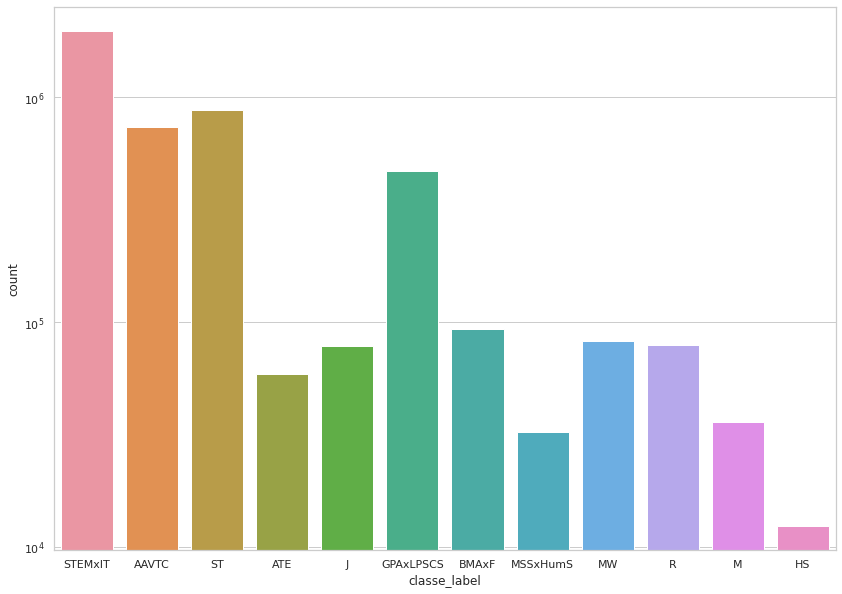

In [183]:
# Distribution of the 12 Career Clusters over the filtered additional dataset
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(14, 10))
sns.countplot(x="classe_label", data=df_name_occup_clustered, log=True)

## Step 5 : Storing the result

Now that the pre-processing has been conducted, it is time for my colleague to perform some data processing.

In order to avoid overloading only one notebook, we decided to share the result of Pre-processing and Data Processing by using pickle format.

In [ ]:
df_name_occup_clustered.to_pickle("df_name_occup_clustered_12.zip")

# Pre-processing (for 10 Career Clusters using pretrained algorithm)

In this pre-processing, we decided to use a pretrained algorithm [Sentence-BERT](https://joeddav.github.io/blog/2020/05/29/ZSL.html), which is a recent technique that fine-tunes the pooled BERT sequence representations for increased semantic richness, as a method for obtaining sequence and label embeddings.

Using this algorithm not only automatically clusters occupations into 10 clusters, but also clusters all of the 6811 occupations, which would drastically increases the performance of pretrained BERT-Base model used to predict occupations.

In [127]:
!pip3 install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 57.5 MB/s 
     |████████████████████████████████| 895 kB 61.5 MB/s 
     |████████████████████████████████| 3.3 MB 52.6 MB/s 
     |████████████████████████████████| 61 kB 432 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [128]:
# load model pretrained on MNLI
from transformers import BartForSequenceClassification, BartTokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-mnli')
model = BartForSequenceClassification.from_pretrained('facebook/bart-large-mnli')

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

##  Step 1 : filtering out multiple occupation speakers

After selecting the meaningful features from the additional dataset, we get the dataframe `df_name_occup`.

Now, we apply some filtering to data in order to have just speakers with one occupation.

This assumption was made to decomplexify the analysis, since our goal is to predict the occupation of a speaker based on his quotations.

In [135]:
df_name_occup = pd.read_pickle("df_name_occup.zip")
df_name_occup

,id,label,occupation
0,Q23,George Washington,"(slaveholder, farmer, cartographer, military o..."
1,Q42,Douglas Adams,"(science fiction writer, playwright, comedian,..."
2,Q1868,Paul Otlet,"(bibliographer, information scientist, librari..."
3,Q207,George W. Bush,"(painter, rugby union player, motivational spe..."
4,Q297,Diego Velázquez,"(painter,)"
...,...,...,...
6073732,Q106406546,Leonard T. Gaskill,"(politician,)"
6073733,Q106406557,Andrew F. Healy,"(politician,)"
6073734,Q106406560,Barker B. Howard,"(politician,)"
6073735,Q106406571,Charles H. Macomber,"(politician,)"


In [136]:
# Counting the number of occupations for each speaker
df_name_occup['num'] =  df_name_occup['occupation'].apply(lambda x: len(x))

# Sorting based on the number of occupations per speaker
df_name_occup = df_name_occup.sort_values(by=['num'], ascending=False)
df_name_occup

,id,label,occupation,num
8862,Q231690,B. R. Ambedkar,"(civil rights advocate, painter, bibliographer...",33
1521446,Q5879,Johann Wolfgang von Goethe,"(painter, poet lawyer, theologian, mineralogis...",30
604,Q34969,Benjamin Franklin,"(slaveholder, chess player, political activist...",24
3054272,Q380407,Nikolai Fomenko,"(racing automobile driver, television actor, f...",24
4557753,Q43432,Justin Timberlake,"(executive producer, television actor, film ac...",24
...,...,...,...,...
3257798,Q11717913,Jan Kapica,(),0
980344,Q11719359,Jan Warenycia,(),0
725478,Q99574609,Dennis Weit,(),0
1446761,Q96074744,Gerald Sandu,(),0


Now, we select only speakers with one occupation :

In [137]:
df_name_occup.drop(df_name_occup[df_name_occup.num != 1].index, inplace=True)

In [138]:
df_name_occup

,id,label,occupation,num
4217584,Q55949992,Jennifer Tieman,"(researcher,)",1
3566293,Q82465167,Ana Paula de Souza Faloni,"(researcher,)",1
3567209,Q83005543,Hossein Mahmoudi,"(researcher,)",1
4254608,Q59706337,Agnieszka Lipiec,"(researcher,)",1
4217407,Q55932331,Kevin McDade,"(artist,)",1
...,...,...,...,...
2243079,Q99555514,Rachel Shah,"(researcher,)",1
2243078,Q99555385,Shubhangi Prabhudesai,"(researcher,)",1
2243077,Q99555373,Matthew B Phillips,"(researcher,)",1
2243094,Q99555985,Marina Kholomyeva,"(researcher,)",1


In [139]:
# We can get rid of 'num' column
df_name_occup.drop(columns=['num'], inplace=True)

In [140]:
df_name_occup

,id,label,occupation
4217584,Q55949992,Jennifer Tieman,"(researcher,)"
3566293,Q82465167,Ana Paula de Souza Faloni,"(researcher,)"
3567209,Q83005543,Hossein Mahmoudi,"(researcher,)"
4254608,Q59706337,Agnieszka Lipiec,"(researcher,)"
4217407,Q55932331,Kevin McDade,"(artist,)"
...,...,...,...
2243079,Q99555514,Rachel Shah,"(researcher,)"
2243078,Q99555385,Shubhangi Prabhudesai,"(researcher,)"
2243077,Q99555373,Matthew B Phillips,"(researcher,)"
2243094,Q99555985,Marina Kholomyeva,"(researcher,)"


One additional sub-step is to change the `occupation` feature to string type. This would be helpful for further pre-processing.

In [141]:
df_name_occup['occupation'] = df_name_occup['occupation'].apply(lambda x: str(x[0]))
df_name_occup['occupation'] = df_name_occup['occupation'].astype("string")
df_name_occup

,id,label,occupation
4217584,Q55949992,Jennifer Tieman,researcher
3566293,Q82465167,Ana Paula de Souza Faloni,researcher
3567209,Q83005543,Hossein Mahmoudi,researcher
4254608,Q59706337,Agnieszka Lipiec,researcher
4217407,Q55932331,Kevin McDade,artist
...,...,...,...
2243079,Q99555514,Rachel Shah,researcher
2243078,Q99555385,Shubhangi Prabhudesai,researcher
2243077,Q99555373,Matthew B Phillips,researcher
2243094,Q99555985,Marina Kholomyeva,researcher


## Let's test it before implementing it on our data !

In [129]:
# pose sequence as a NLI premise and label (sports) as a hypothesis
premise = 'badminton player'
hypothesis = 'This occupation is related to sports'

In [130]:
# run through model pre-trained on MNLI
input_ids = tokenizer.encode(premise, hypothesis, return_tensors='pt')
logits = model(input_ids)[0]

In [131]:
# we throw away "neutral" (dim 1) and take the probability of
# "entailment" (2) as the probability of the label being true 
entail_contradiction_logits = logits[:,[0,2]]
probs = entail_contradiction_logits.softmax(dim=1)
true_prob = probs[:,1].item() * 100
print(f'Probability that the label is true: {true_prob:0.2f}%')

Probability that the label is true: 99.97%


So, the probability that the occupation of badminton player is 99.97% related to sports, which we can confirm.

We can see that Sentence-BERT algorithm is really powerful when it comes to linking a word or a sentence to a specific field !

**Note :** We will take into consideration the prediction confidence of this algorithm.


## Now let's try it on our data !

In [142]:
df_name_occup_grouped_sorted = df_name_occup.groupby(by='occupation').count().sort_values(by='id', ascending=False)
df_name_occup_grouped_sorted

,id,label
occupation,,
researcher,1666625,1666625
politician,375297,375297
association football player,279531,279531
actor,143110,143110
basketball player,126539,126539
...,...,...
data journalist,1,1
data librarian,1,1
dauphin of France,1,1


**Note :** the `id` and `label` are both representing the number of times each occupation got reapeated in the filtered additional dataset.

In [143]:
df_name_occup_grouped_sorted.rename(columns={"label": "num_occurencies"}, inplace=True)
df_name_occup_grouped_sorted.drop(columns='id', inplace=True)

In [144]:
df_name_occup_grouped_sorted

,num_occurencies
occupation,
researcher,1666625
politician,375297
association football player,279531
actor,143110
basketball player,126539
...,...
data journalist,1
data librarian,1
dauphin of France,1


In [148]:
df_name_occup_grouped_sorted.reset_index(inplace=True)

In [149]:
df_name_occup_grouped_sorted

,occupation,num_occurencies
0,researcher,1666625
1,politician,375297
2,association football player,279531
3,actor,143110
4,basketball player,126539
...,...,...
6806,data journalist,1
6807,data librarian,1
6808,dauphin of France,1
6809,decemviri,1


Here is the 10 Career Clusters we used for the occupation clustering using this algorithm : 

In [145]:
classes_full_name = ['arts & audio and video technology & communications & manufacturing', 
           'business management & finance', 
           'government & public administration & law & public safety & corrections & security', 
           'marketing & sales & human service', 
           'academic & teacher & education', 
           'sports & training', 
           'science & engineering & mathematics & information technology & health science',  
           'religion', 
           'journalism', 
           'military & war']

In [146]:
class_label = ['AAVTCM', 'BMF', 'GPALPSCS', 'MSHS', 'ATE', 'ST', 'SEMITHS', 'R', 'J', 'MW']

In [147]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In order to implement this algorithm, we decided to state the 10 hypotheses about each unique occupation in the additional dataset, and choose to cluster the occupation with respect to the highest probability.

**Note :**

This occupation clustering algorithm takes about 8 hours to run.

In [151]:
# Create the function that states the hypothesis about each class
def state_hypotheses():
  hypothesis_class_1 = 'This occupation is related to arts & audio and video technology & communications & manufacturing'
  hypothesis_class_2 = 'This occupation is related to business management & finance'
  hypothesis_class_3 = 'This occupation is related to government & public administration & law & public safety & corrections & security'
  hypothesis_class_4 = 'This occupation is related to marketing & sales & human service'
  hypothesis_class_5 = 'This occupation is related to academic & teacher & education'
  hypothesis_class_6 = 'This occupation is related to sports & training'
  hypothesis_class_7 = 'This occupation is related to science & engineering & mathematics & information technology & health science'
  hypothesis_class_8 = 'This occupation is related to religion'
  hypothesis_class_9 = 'This occupation is related to journalism'
  hypothesis_class_10 = 'This occupation is related to military & war'

  list_hypothesises = [hypothesis_class_1, hypothesis_class_2, hypothesis_class_3, 
                       hypothesis_class_4, hypothesis_class_5, hypothesis_class_6, 
                       hypothesis_class_7, hypothesis_class_8, hypothesis_class_9, 
                       hypothesis_class_10]
  return list_hypotheses

In [ ]:
list_hypotheses = state_hypotheses()

for i in range(1, (df_name_occup_grouped_sorted.shape[0]+1)):
  # pose sequence as a NLI premise and label as a hypothesises
  premise = df_name_occup_grouped_sorted.loc[i, 'occupation']
  hyp_probs = []

  # run through model pre-trained on MNLI for each hypothesis
  for hypothesis in list_hypotheses:
    input_ids = tokenizer.encode(premise, hypothesis, return_tensors='pt')
    logits = model(input_ids)[0]

    # we throw away "neutral" (dim 1) and take the probability of
    # "entailment" (2) as the probability of the label being true 
    entail_contradiction_logits = logits[:,[0,2]]
    probs = entail_contradiction_logits.softmax(dim=1)
    true_prob = probs[:,1].item() * 100
    #print(f'Probability that the label is true: {true_prob:0.2f}%')

    hyp_probs.append(true_prob)
  print(hyp_probs)

  df_name_occup_grouped_sorted.loc[i, 'occupation_cluster'] = classes[np.argmax(hyp_probs)]
  df_name_occup_grouped_sorted.loc[i, 'clustering_confidence'] = hyp_probs[np.argmax(hyp_probs)]
  df_name_occup_grouped_sorted.loc[i, 'class_label'] = class_label[np.argmax(hyp_probs)]
  df_name_occup_grouped_sorted.loc[i, 'class'] = classes[np.argmax(hyp_probs)]

df_name_occup_grouped_sorted.drop(columns=['id', 'label'], inplace=True)

**Note :** The output after running the previous cell was stored since it took 8 hours.

In [ ]:
df_name_occup_grouped_sorted = pd.read_pickle("df_join_result_10.zip")
df_name_occup_grouped_sorted

,class_label,occupation_cluster,occupation,clustering_confidence,class
0,AAVTCM,arts & audio and video technology & communicat...,actor,98.0476,0
1,AAVTCM,arts & audio and video technology & communicat...,visual artist,99.681,0
2,AAVTCM,arts & audio and video technology & communicat...,musician,97.832,0
3,AAVTCM,arts & audio and video technology & communicat...,artist,99.3233,0
4,AAVTCM,arts & audio and video technology & communicat...,photographer,88.8802,0
...,...,...,...,...,...
6806,ST,sports & training,cue sports,96.4066,5
6807,ST,sports & training,cycling activist,99.7911,5
6808,ST,sports & training,cyclo-cross,98.8134,5
6809,ST,sports & training,darts,98.4999,5


#### Plot the prediction confidence of the algorithm for each class

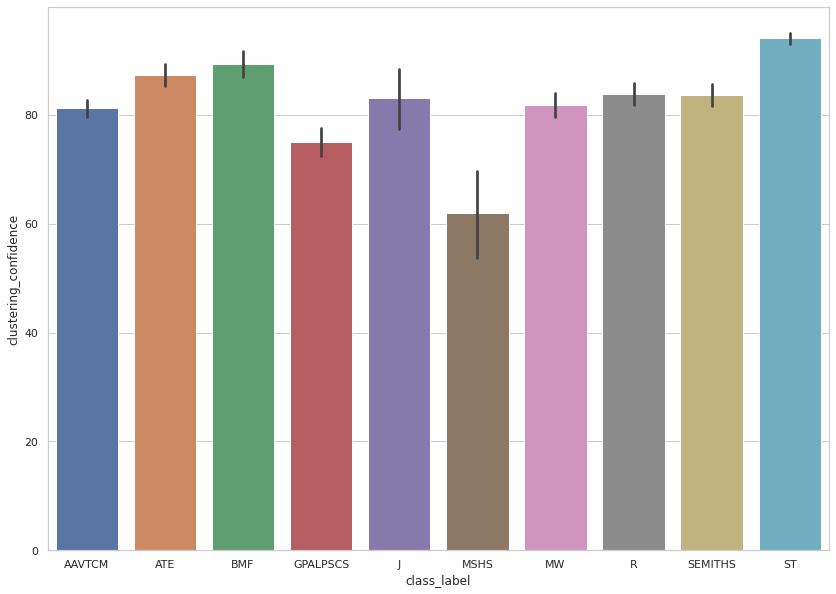

In [ ]:
# Distribution of the prediction confidence of the algorithm
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(14, 10))
sns.barplot(x="class_label", y="clustering_confidence", data=df_name_occup_grouped_sorted)

### Join the result with the filtered additional dataset

In [ ]:
df_name_occup_clustered = df_name_occup_grouped_sorted.reset_index().set_index('occupation').drop(columns='index').join(df_name_occup.reset_index().set_index('occupation'))

In [ ]:
df_name_occup_clustered.reset_index(inplace=True)

In [ ]:
df_name_occup_clustered.set_index('index', inplace=True)

In [ ]:
df_name_occup_clustered

,occupation,class_label,occupation_cluster,clustering_confidence,class,id,label
index,,,,,,,
5635908,1859,MW,military & war,78.2195,9,Q22797067,Thomas Harris
844651,3-cushion player,ST,sports & training,99.3715,5,Q3081435,Francis Forton
2799826,3-cushion player,ST,sports & training,99.3715,5,Q76885206,Nguyễn Đức Anh Chiến
4316758,3-cushion player,ST,sports & training,99.3715,5,Q77664563,Augusto Vergez
3414448,7th State Duma of the Russian Federation,GPALPSCS,government & public administration & law & pub...,77.5579,2,Q42370437,Dmitry Ionin
...,...,...,...,...,...,...,...
200772,Оrdinary professor,ATE,academic & teacher & education,99.8187,4,Q9341704,Stanisław Błaszkowiak
3718875,Оrdinary professor,ATE,academic & teacher & education,99.8187,4,Q95905011,Robert Jaretzky
4214948,Оrdinary professor,ATE,academic & teacher & education,99.8187,4,Q55683940,Joannes Evangelista Vintler


### Plot the distribution of classes over the additional dataset

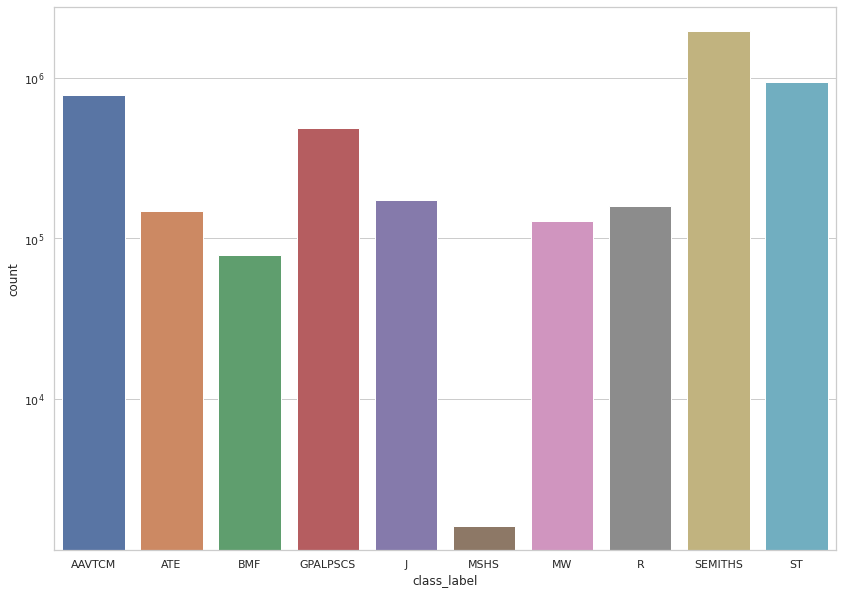

In [ ]:
# Distribution of the prediction confidence for each occupation
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(14, 10))
sns.countplot(x="class_label", order=['AAVTCM','ATE','BMF','GPALPSCS','J','MSHS','MW', 'R', 'SEMITHS', 'ST'], data=df_name_occup_clustered, log=True)

## Store the Data :

In [152]:
df_name_occup_clustered.to_pickle("df_name_occup_clustered_10_algo.zip")